<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/Hierarchical_Clustering_(EastWestAirlines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [2]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [4]:
from pandas import read_excel
ewa = pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)



In [5]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(ewa.iloc[:,1:-1])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


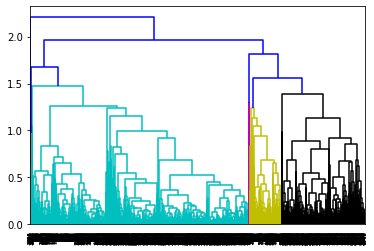

In [8]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

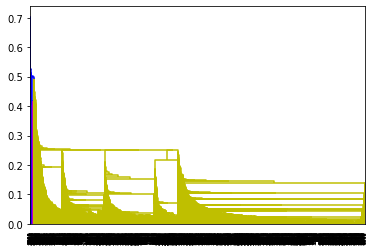

In [9]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

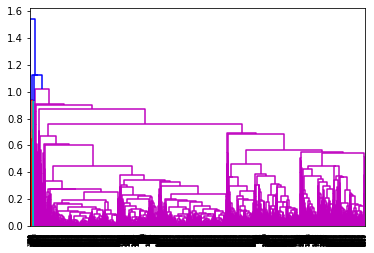

In [10]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

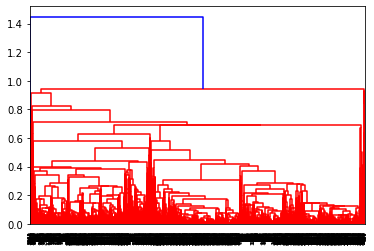

In [11]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

Since we are not able to get infrences from the dendrogram we can try with Elbow Chart to get the optimal number of clusters for this Dataset. Just for practical purspose I am trying this. In real time data we shouldn't use Hierarchial clustering for large data sets because of 2 reasons. 

1. Dendrogram wont give infrences for clusters
2. Computation time and resources are high

In [14]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([1185.5413391]),
 array([971.64087544]),
 array([879.65309501]),
 array([822.44189879]),
 array([765.98020267]),
 array([717.70880787])]

([<matplotlib.axis.XTick at 0x7f650a06e780>,
 <a list of 6 Text major ticklabel objects>)

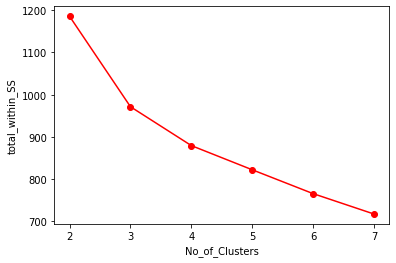

In [15]:
#Elbow Chart
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [16]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [17]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [18]:
ewa['h_clusterid'] = pd.DataFrame(y_hc)

In [19]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [20]:
#Grouping Data for predictions further 

result=ewa.iloc[:,1:-2].groupby(ewa.h_clusterid).mean()


In [21]:
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
h_clusterid,,,,,,,,,,
0,107121.805755,148.161151,3.666906,1.001439,1.033094,38980.861151,18.749640,476.129496,1.424460,4185.129496
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000
2,55625.489827,141.643762,1.201152,1.021497,1.001152,5418.927447,7.699424,421.536660,1.272937,4085.983877
